In [10]:
from joblib import dump, load

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split

import dask.dataframe as dd

In [2]:
model_knn = load('models/knn.joblib')

In [ ]:
model_nn = load('models/neural_network_1.model')
model_dtc_ada = load('models/DecisionTreeClassifier_AdaBoost.joblib')
model_rfc = load('models/RandomForestClassifier.joblib')
model_rfc_ada = load('models/RandomForestClassifier_AdaBoost.joblib')

In [13]:
df = dd.read_csv('prepared_ds.csv').compute()

In [14]:
train, test, train_lbl, test_lbl = train_test_split(df[df.columns[1:-1]], df['Label'], 
                                                    test_size=0.2, random_state=1)
del(train, train_lbl)

### Neural Network

In [19]:
%%time
model_nn.score(test, test_lbl)

CPU times: user 7.92 s, sys: 655 ms, total: 8.57 s
Wall time: 8.87 s


0.9979329493423952

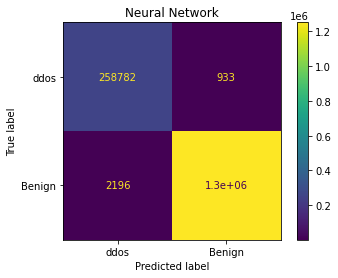

In [28]:
fig_random = plot_confusion_matrix(model_nn, test, test_lbl, labels=['ddos', 'Benign'])
fig_random.ax_.set_title('Neural Network')
fig_random.figure_.savefig('img/confusion_matrix_nn.png')

### Decision Tree Classifier AdaBoost

In [20]:
%%time
model_dtc_ada.score(test, test_lbl)

CPU times: user 21.8 s, sys: 4.8 s, total: 26.6 s
Wall time: 33.8 s


0.9998454171128541

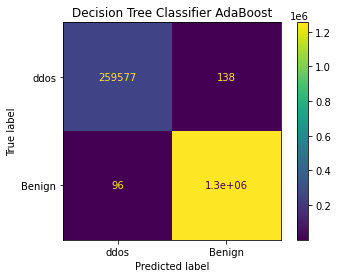

In [27]:
fig_random = plot_confusion_matrix(model_dtc_ada, test, test_lbl, labels=['ddos', 'Benign'])
fig_random.ax_.set_title('Decision Tree Classifier AdaBoost')
fig_random.figure_.savefig('img/confusion_matrix_dtc_ada.png')

### Random Forest

In [21]:
%%time
model_rfc.score(test, test_lbl)

CPU times: user 12.4 s, sys: 605 ms, total: 13 s
Wall time: 17 s


0.9998540050510288

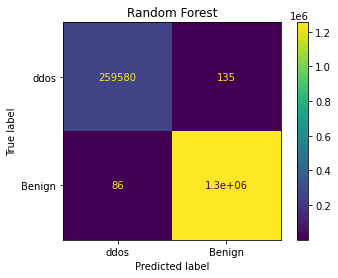

In [33]:
fig_random = plot_confusion_matrix(model_rfc, test, test_lbl, labels=['ddos', 'Benign'])
fig_random.ax_.set_title('Random Forest')
fig_random.figure_.savefig('img/confusion_matrix_rfc.png')

### Random Forest AdaBoost

In [22]:
%%time
model_rfc_ada.score(test, test_lbl)

CPU times: user 51.2 s, sys: 3.35 s, total: 54.6 s
Wall time: 1min 10s


0.9998625929892037

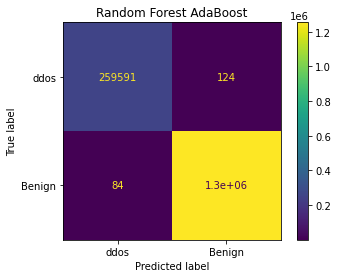

In [30]:
fig_random = plot_confusion_matrix(model_rfc_ada, test, test_lbl, labels=['ddos', 'Benign'])
fig_random.ax_.set_title('Random Forest AdaBoost')
fig_random.figure_.savefig('img/confusion_matrix_rfc_ada.png')

### K Nearest Neighbours

In [23]:
%%time
model_knn.score(test, test_lbl)

CPU times: user 4min 52s, sys: 9.56 s, total: 5min 1s
Wall time: 7min 11s


0.9997819984924865

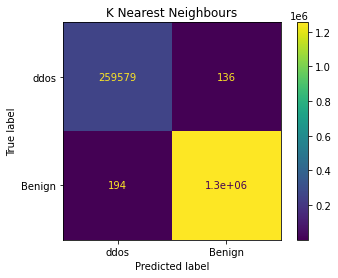

In [31]:
fig_random = plot_confusion_matrix(model_knn, test, test_lbl, labels=['ddos', 'Benign'])
fig_random.ax_.set_title('K Nearest Neighbours')
fig_random.figure_.savefig('img/confusion_matrix_knn.png')